# Basemap example

## References
https://matplotlib.org/basemap/users/geography.html <br>
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

## Example

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
palma = pd.read_csv(
            "cruiseshiptourism_palma/data/palmapointsofinterest.csv", 
            header = 0,
            dtype = {
                "name": 'str',
                "description": 'str',
                "latitude": 'float',
                "longitude": 'float',
                "stars": 'float',
                "reviews": 'float'
            }
        )

In [3]:
palma.dtypes

description     object
latitude       float64
longitude      float64
name            object
reviews        float64
stars          float64
dtype: object

In [8]:
palma.head(10)

,description,latitude,longitude,name,reviews,stars
0,Gothic place of worship on the seafront,39.567425,2.648299,Catedral-Basílica de Santa María de Mallorca,31176.0,4.674750
1,Hilltop 1300s castle for panoramic views,39.563814,2.619354,Castell de Bellver,10446.0,4.436243
2,Historic palace of the Royal Family,39.567886,2.647022,Royal Palace of La Almudaina,2310.0,4.420346
3,Aquarium with huge shark-viewing tank,39.531374,2.729529,Palma Aquarium,14764.0,4.367786
4,Scenic electric railway dating to 1912,39.576665,2.653782,Tren Soller,5757.0,4.396561
5,Modern & contemporary art collection,39.570139,2.641112,Es Baluard Museu d'Art Contemporani de Palma,2513.0,4.257859
6,Historic public square with craft market,39.571371,2.651813,Plaza Mayor,21071.0,4.244744
7,Historic sanctuary & pilgrimage site,39.822118,2.884384,Santuari de Lluc,4139.0,4.381493
8,Venue with recreated Spanish landmarks,39.572720,2.627968,Poble Espanyol de Palma,2430.0,4.057202
9,Historic building with Gothic design,39.568358,2.644337,Lonja de Mallorca,1956.0,4.441206


### Solo localizaciones

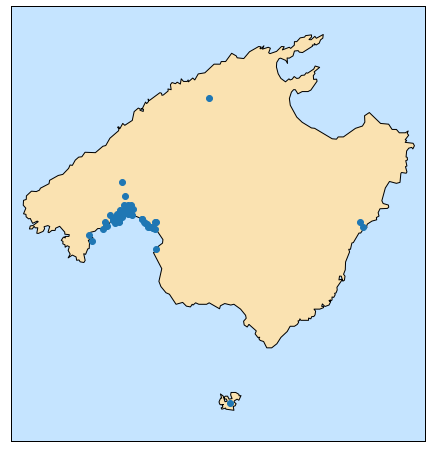

In [5]:
# values
latitude = palma['latitude'].values
longitude = palma['longitude'].values

# Map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(
            projection='merc', resolution='h',
            llcrnrlat=39.055777,  # The lower left corner geographical latitude
            llcrnrlon=2.310797,   # The lower left corner geographical longitude
            urcrnrlat=40.025957,  # The upper right corner geographical latitude
            urcrnrlon=3.508145   # The upper right corner geographical longitude
        )

m.drawcoastlines()
m.drawmapboundary(fill_color='#C5E4FF')
m.fillcontinents(color='#FAE2B1')

# scatter data,color by stars, size by reviews
m.scatter(longitude, latitude, latlon=True,
          cmap='Reds', alpha=1, zorder=10)


### Localizaciones con utilidad y número de comentarios

In [6]:
palma_clean = palma.dropna()

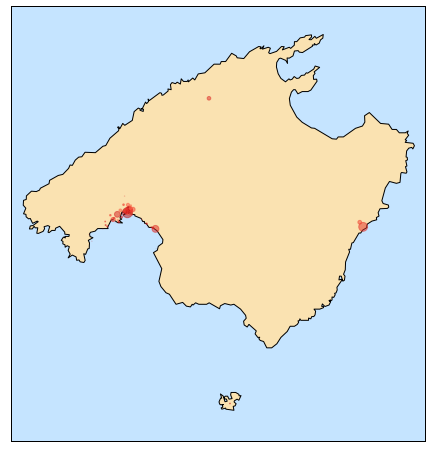

In [7]:
# New values
latitude = palma_clean['latitude'].values
longitude = palma_clean['longitude'].values
stars = palma_clean['stars'].values
reviews = palma_clean['reviews'].values

# Map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(
            projection='merc', resolution='h',
            llcrnrlat=39.055777,  # The lower left corner geographical latitude
            llcrnrlon=2.310797,   # The lower left corner geographical longitude
            urcrnrlat=40.025957,  # The upper right corner geographical latitude
            urcrnrlon=3.508145   # The upper right corner geographical longitude
        )

m.drawcoastlines()
m.drawmapboundary(fill_color='#C5E4FF')
m.fillcontinents(color='#FAE2B1')

norm_reviews = (reviews-min(reviews))/(max(reviews)-min(reviews))
# scatter data,color by stars, size by reviews
m.scatter(longitude, latitude, latlon=True,
          c=stars, s=norm_reviews*100,
          cmap='Reds', alpha=0.5, zorder=10)